In [99]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [101]:
# Carregar a base de dados

path = kagglehub.dataset_download("asinow/car-price-dataset")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/asinow/car-price-dataset/versions/1


['car_price_dataset.csv']

In [102]:
path = '/root/.cache/kagglehub/datasets/asinow/car-price-dataset/versions/1'
df = pd.read_csv(path + '/car_price_dataset.csv')

## Propriedades dos dados:

In [22]:
# Verificando as linhas iniciais do dataset
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [23]:
# Verificando todas as colunas com os tipos de dados e a quantidade de conteúdos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


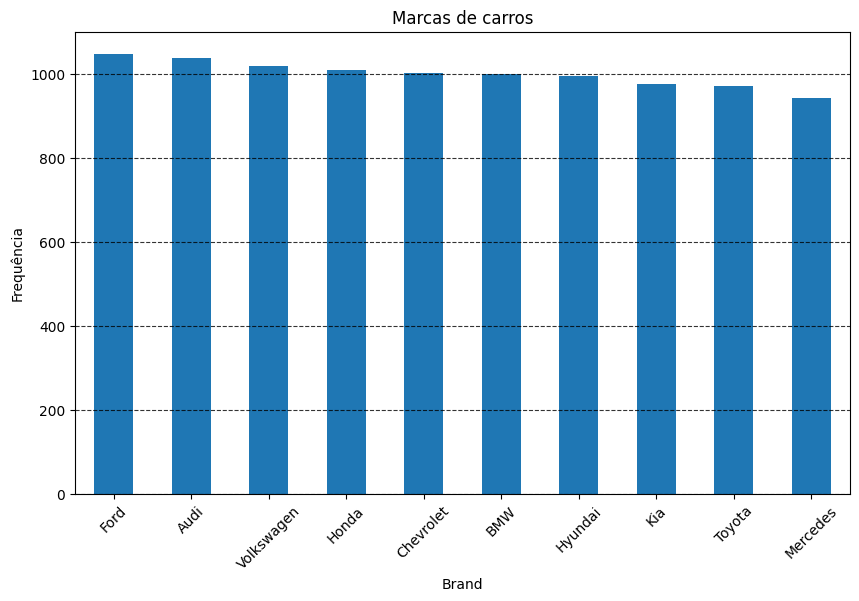

In [26]:
plt.figure(figsize=(10, 6))
plt.title("Marcas de carros")
plt.xlabel("Brand")
plt.ylabel("Frequência")
df['Brand'].value_counts().plot(kind='bar')
plt.grid(axis='y', linestyle='--', alpha=0.8, color='black')
plt.xticks(rotation=45)
plt.show()

In [25]:
qtd_marca = df['Brand'].value_counts().reset_index(name='Frequência')
qtd_marca.columns = ['Marca', 'Frequência']
qtd_marca

,Marca,Frequência
0,Ford,1048
1,Audi,1038
2,Volkswagen,1020
3,Honda,1009
4,Chevrolet,1003
5,BMW,999
6,Hyundai,995
7,Kia,976
8,Toyota,970
9,Mercedes,942


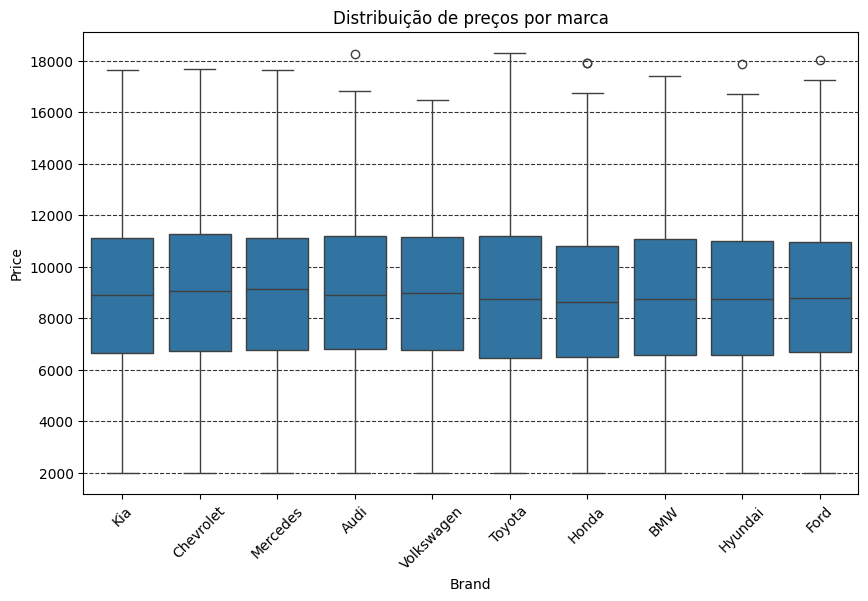

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'Brand', y = 'Price')
plt.title("Distribuição de preços por marca")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.8, color='black')
plt.xticks(rotation=45)
plt.show()

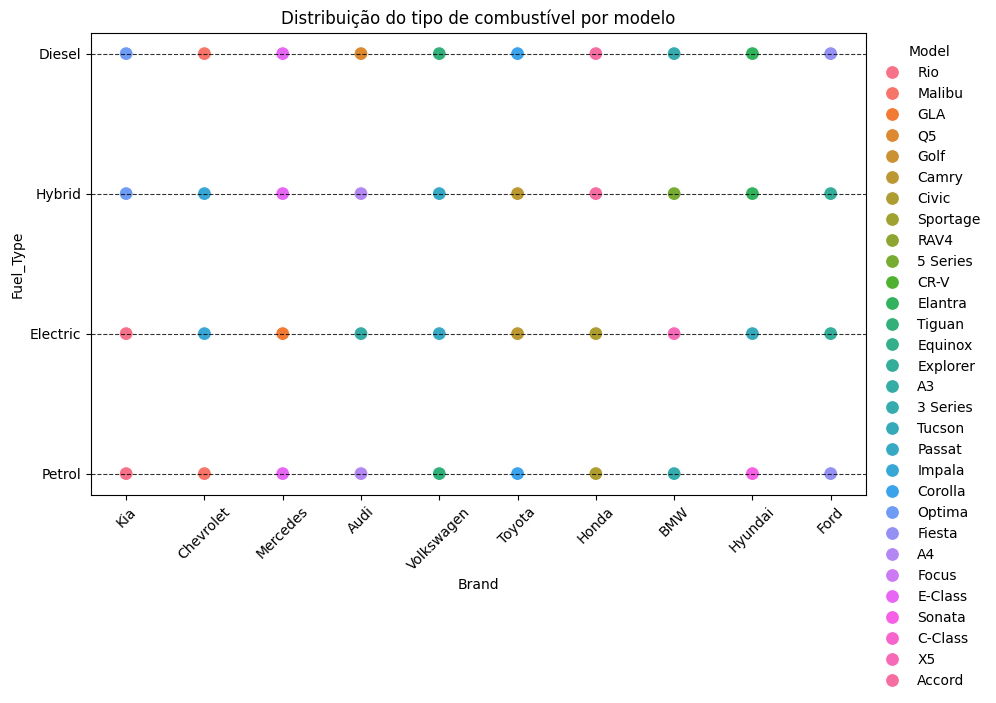

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x = 'Brand', y = 'Fuel_Type', hue='Model', s = 100)
plt.title("Distribuição do tipo de combustível por modelo")
plt.xlabel("Brand")
plt.ylabel("Fuel_Type")
plt.grid(axis='y', linestyle='--', alpha=0.8, color='black')
plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.xticks(rotation=45)
plt.show()

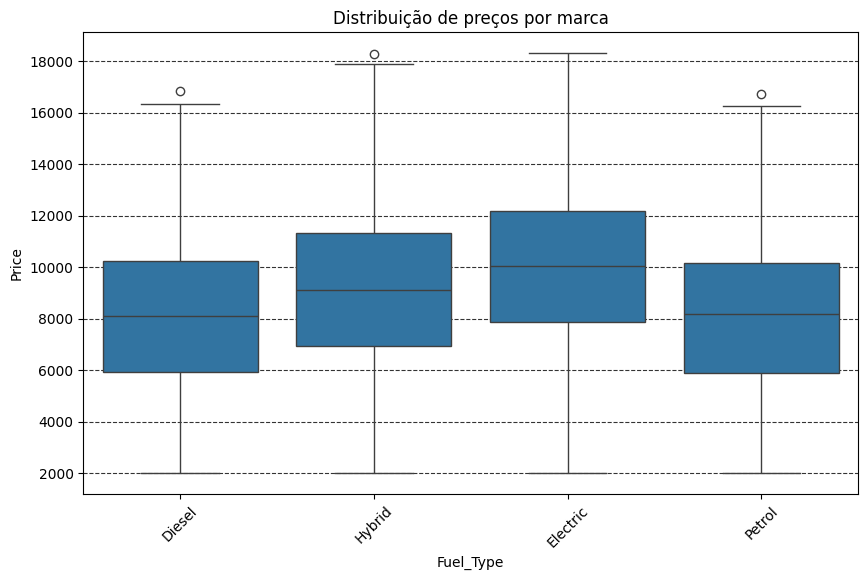

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'Fuel_Type', y = 'Price')
plt.title("Distribuição de preços por tipo de combustível")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.8, color='black')
plt.xticks(rotation=45)
plt.show()

# ML:

In [100]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression

In [103]:
df.drop(["Model","Brand"],axis=1,inplace=True)

In [104]:
df=pd.get_dummies(df,columns=["Fuel_Type","Transmission"],drop_first=True).astype(int)

In [105]:
X = df.drop("Price", axis=1)
y = df['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.20,random_state=42)

# **RFC**

In [106]:
# Treinamento do modelo
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train, y_train)

# Previsões
y_pred = rfc_model.predict(X_test)
rfc_model.score(X_test,y_test)

0.007

# **RFR**

In [107]:
# Treinamento do modelo
rfr_model = RandomForestRegressor(n_estimators=300,max_depth=20,min_samples_split=2)
rfr_model.fit(X_train, y_train)

# Previsões
y_pred = rfr_model.predict(X_test)
rfr_model.score(X_test,y_test)

0.942551732494599

# **LR**

In [109]:
# Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9910216944416946